In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Tempo")
    plt.ylabel("Média de manchas solares por mês")
    plt.grid(True)

In [ ]:
df.loc[df.index[3000]]

Data              1999-01-31
Manchas_totais            86
ano                     1999
mes                        1
media_movel          91.5083
Name: 3000, dtype: object

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Data Science/Kaggle/sunspots/Sunspots.csv',index_col=0,
                   names=['Data','Manchas_totais'],header=0)
df

,Data,Manchas_totais
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7
...,...,...
3247,2019-08-31,0.5
3248,2019-09-30,1.1
3249,2019-10-31,0.4
3250,2019-11-30,0.5


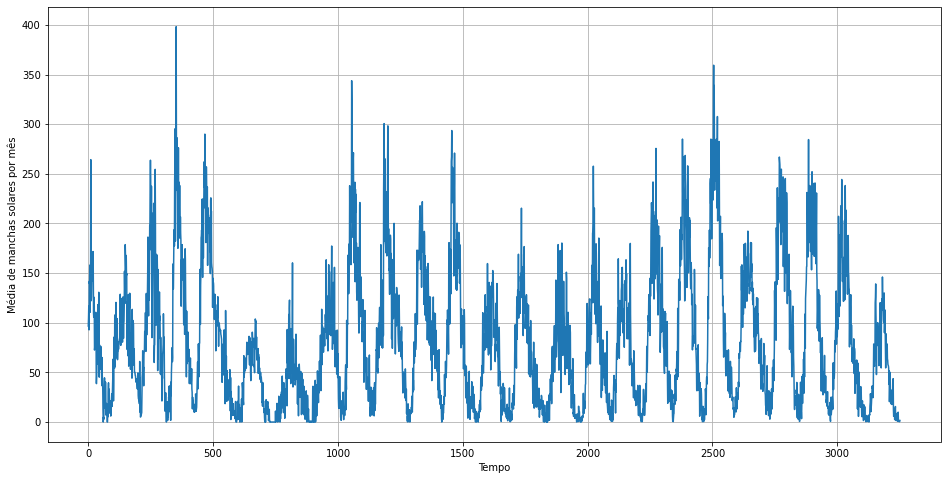

In [ ]:
plt.figure(figsize=(16, 8))
plot_series(df.index, df.Manchas_totais)

In [ ]:
df['ano'] = pd.DatetimeIndex(df['Data']).year
df['mes'] = pd.DatetimeIndex(df['Data']).month

In [ ]:
year_mean = pd.DataFrame(df.groupby('ano').mean()['Manchas_totais'])

In [ ]:
year_mean.to_excel('media_por_ano.xlsx', header=True, index=True)

Text(0.5, 1.0, 'Box plot por mes\n(Sazonalidade)')

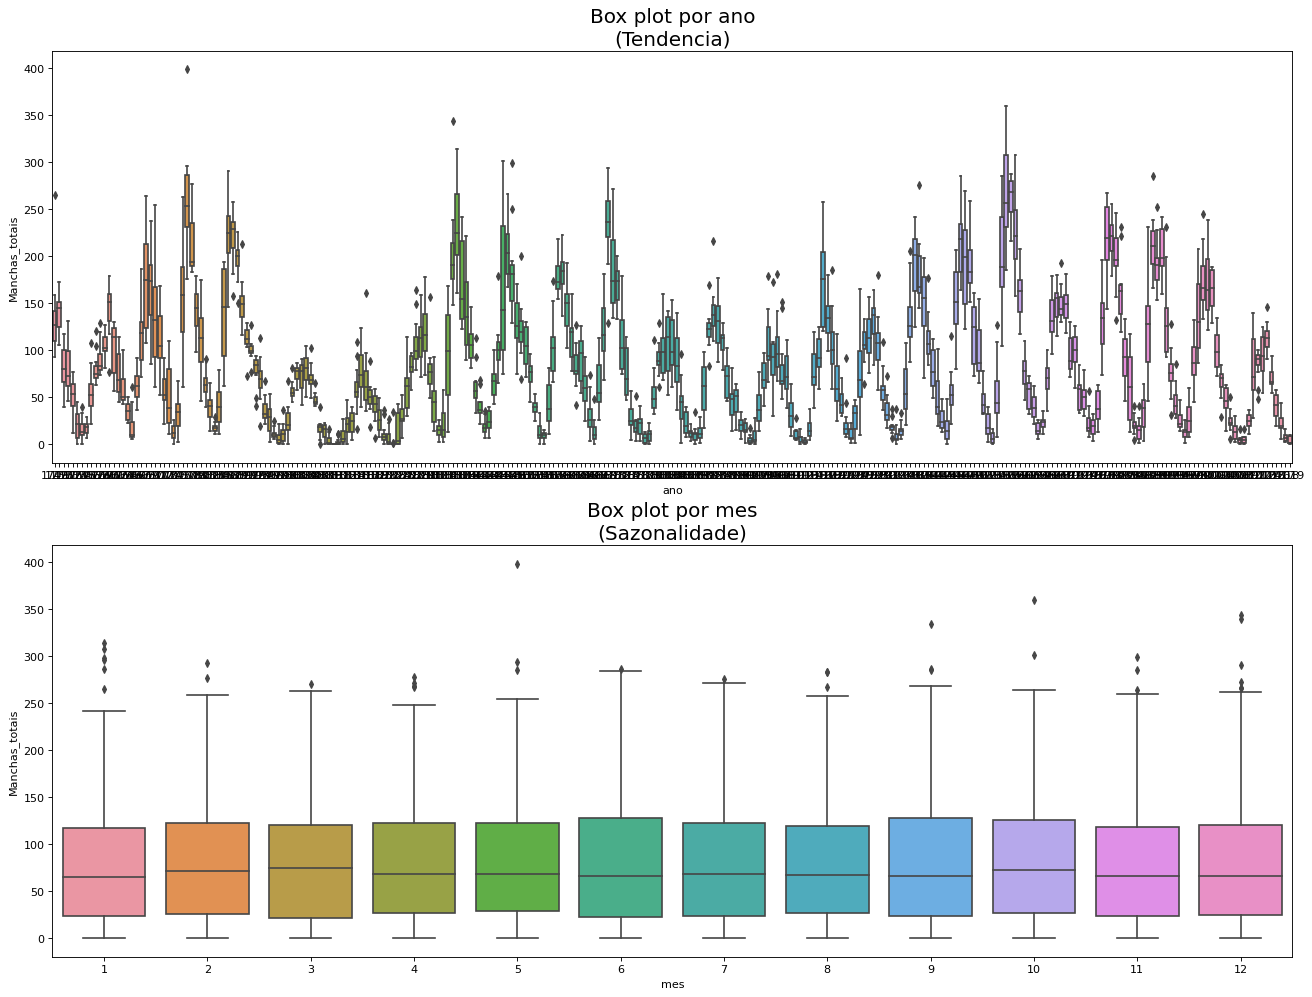

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(20,15), dpi= 80)
sns.boxplot(x='ano', y='Manchas_totais', data=df, ax=axes[0])
sns.boxplot(x='mes', y='Manchas_totais', data=df, ax=axes[1])

axes[0].set_title('Box plot por ano\n(Tendencia)', fontsize=18); 

axes[1].set_title('Box plot por mes\n(Sazonalidade)', fontsize=18)


In [ ]:
time = df.index
series = np.array(df['Manchas_totais'])

In [ ]:
split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]
curto_prazo = 3012
medio_prazo = 3060
x_valid_curto = series[split_time:curto_prazo]
x_valid_medio = series[split_time:medio_prazo]

In [ ]:
len(x_valid.values)

252

In [ ]:
df_out = pd.DataFrame(index=range(1, 253), data=x_valid.values, columns=['Manchas'])

In [ ]:
df_out.to_excel('manchas_solares.xlsx', index=True, header=True)

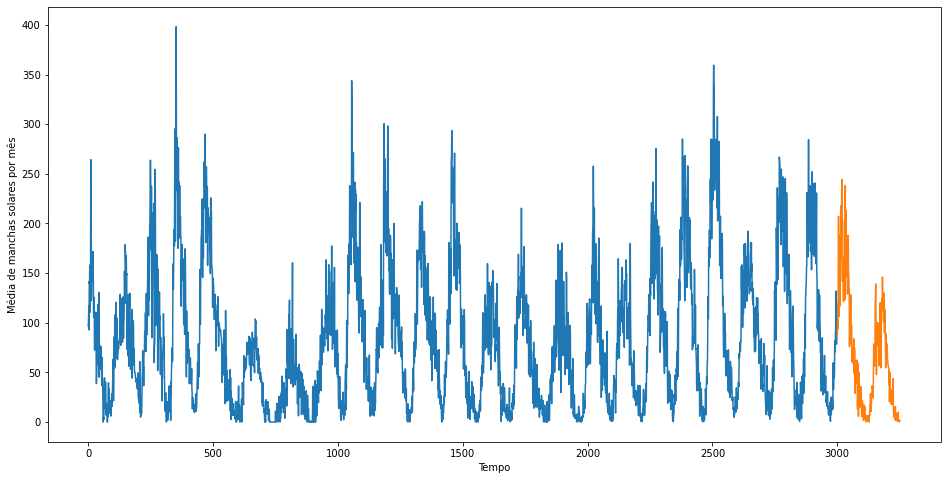

In [ ]:
plt.figure(figsize=(16, 8))
plot_series(time_train, x_train)
plot_series(time_valid, x_valid)
plt.grid(False)

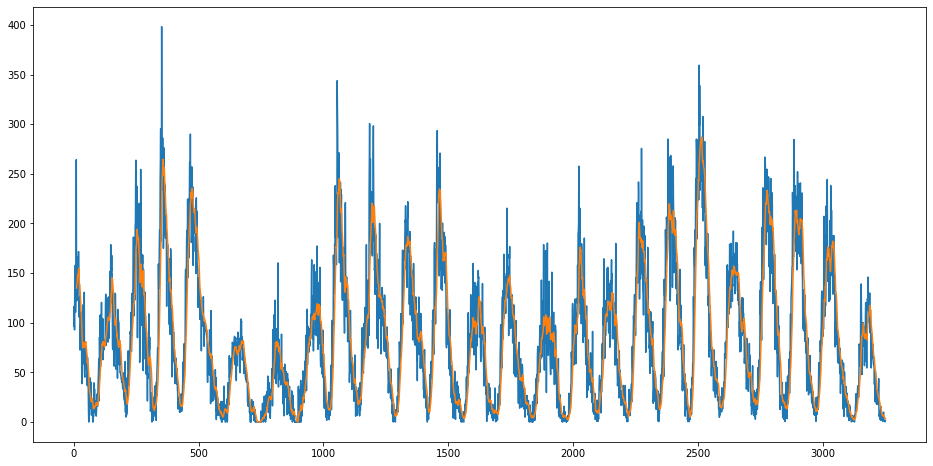

In [ ]:
df['media_movel'] = df['Manchas_totais'].rolling(12).mean()
plt.figure(figsize=(16, 8))
plt.plot(df['Manchas_totais'])
plt.plot(df['media_movel'])

In [ ]:
df.loc[split_time:]

,Data,Manchas_totais,ano,mes,media_movel
3000,1999-01-31,86.0,1999,1,91.508333
3001,1999-02-28,98.0,1999,2,95.491667
3002,1999-03-31,103.5,1999,3,97.283333
3003,1999-04-30,93.6,1999,4,99.200000
3004,1999-05-31,149.6,1999,5,105.500000
...,...,...,...,...,...
3247,2019-08-31,0.5,2019,8,4.641667
3248,2019-09-30,1.1,2019,9,4.458333
3249,2019-10-31,0.4,2019,10,4.083333
3250,2019-11-30,0.5,2019,11,3.716667


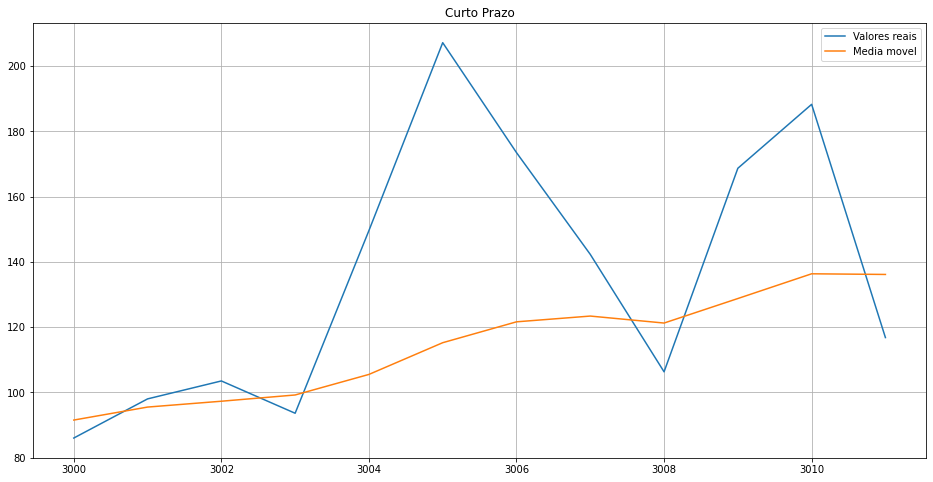

In [ ]:
media_movel = df['media_movel']
media_movel_valid = media_movel[split_time:curto_prazo]
plt.figure(figsize=(16, 8))
plt.plot(x_valid_curto, label='Valores reais')
plt.plot(media_movel_valid, label='Media movel')
plt.title('Curto Prazo')
plt.legend()
plt.grid(True)
plt.show()

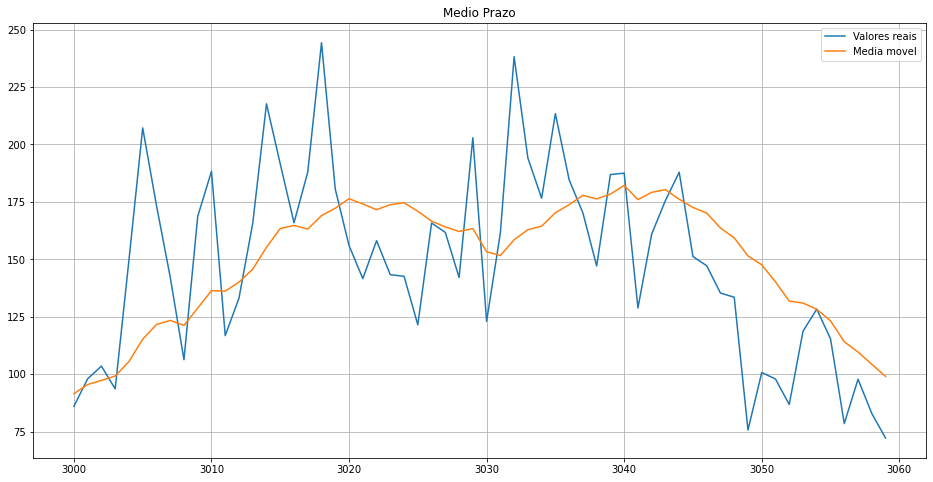

In [ ]:
media_movel = df['media_movel']
media_movel_valid = media_movel[split_time:medio_prazo]
plt.figure(figsize=(16, 8))
plt.plot(x_valid_medio, label='Valores reais')
plt.plot(media_movel_valid, label='Media movel')
plt.title('Medio Prazo')
plt.legend()
plt.grid(True)
plt.show()

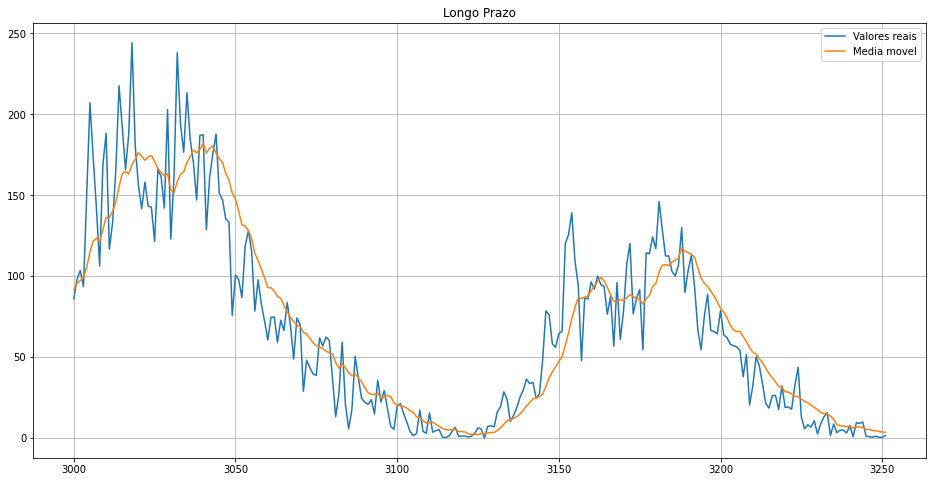

In [ ]:
media_movel = df['media_movel']
media_movel_valid = media_movel[split_time:]
plt.figure(figsize=(16, 8))
plt.plot(x_valid, label='Valores reais')
plt.plot(media_movel_valid, label='Media movel')
plt.title('Longo Prazo')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
window_size = 64
batch_size = 256
shuffle_buffer = 1000
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer)
print(train_set)
print(x_train.shape)

<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>
(3000,)


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

In [ ]:
loss = tf.keras.losses.Huber()
optim = tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9)

model.compile(optimizer=optim, loss=loss, metrics=['mae'])

history = model.fit(train_set, epochs=500)

Epoch 1/500
12/12 [==============================] - 0s 24ms/step - loss: 16.6792 - mae: 17.1693
Epoch 2/500
12/12 [==============================] - 0s 26ms/step - loss: 16.7179 - mae: 17.2085
Epoch 3/500
12/12 [==============================] - 0s 26ms/step - loss: 16.9342 - mae: 17.4250
Epoch 4/500
12/12 [==============================] - 0s 26ms/step - loss: 16.9243 - mae: 17.4148
Epoch 5/500
12/12 [==============================] - 0s 28ms/step - loss: 16.8008 - mae: 17.2913
Epoch 6/500
12/12 [==============================] - 0s 27ms/step - loss: 16.7587 - mae: 17.2490
Epoch 7/500
12/12 [==============================] - 0s 27ms/step - loss: 16.7558 - mae: 17.2464
Epoch 8/500
12/12 [==============================] - 0s 27ms/step - loss: 16.7555 - mae: 17.2459
Epoch 9/500
12/12 [==============================] - 0s 28ms/step - loss: 16.6886 - mae: 17.1792
Epoch 10/500
12/12 [==============================] - 0s 28ms/step - loss: 16.6765 - mae: 17.1668
Epoch 11/500
12/12 [=========

Text(0.5, 1.0, 'Media do erro absoluto')

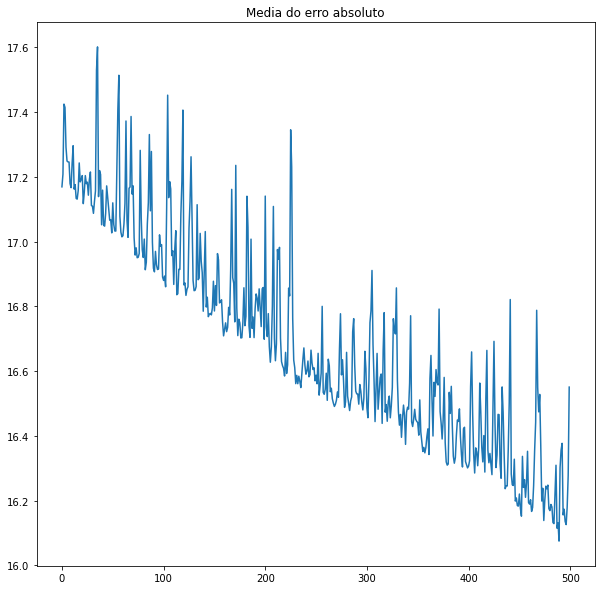

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(history.history['mae'])
plt.title('Media do erro absoluto')

In [ ]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [ ]:
len(series[split_time:, np.newaxis])

252

In [ ]:
window_size

64

In [ ]:
forecast = model_forecast(model, series[..., np.newaxis], window_size)
forecast = forecast[split_time - window_size:-1, -1, 0]

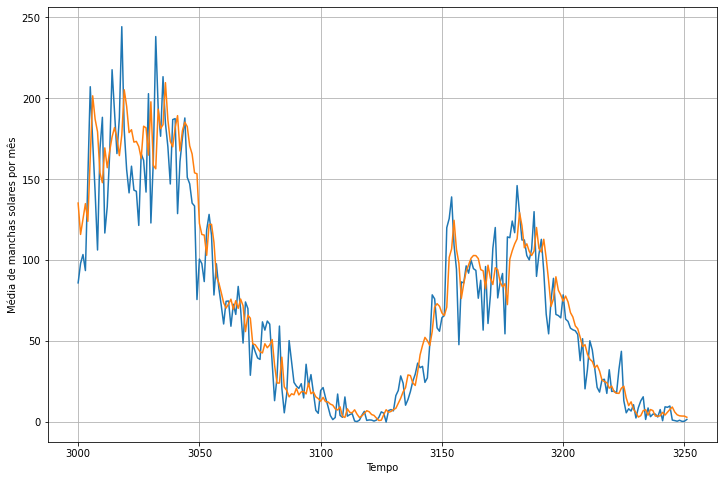

In [ ]:
plt.figure(figsize=(12, 8))
plot_series(time_valid, x_valid)
plot_series(time_valid, forecast)

In [ ]:
forecast

array([135.31012   , 115.925896  , 125.63727   , 134.96112   ,
       124.007286  , 163.7542    , 201.58415   , 187.19753   ,
       179.33258   , 153.94287   , 147.89742   , 169.40538   ,
       157.1589    , 167.39114   , 176.22488   , 181.95299   ,
       175.5022    , 164.6233    , 177.35529   , 205.31744   ,
       195.10889   , 178.86464   , 180.62938   , 172.97144   ,
       173.41812   , 170.26523   , 162.95433   , 182.80557   ,
       181.78055   , 164.94812   , 197.87616   , 158.62149   ,
       156.4836    , 193.34601   , 181.30026   , 183.74226   ,
       209.71971   , 186.83484   , 173.43549   , 170.06276   ,
       181.8828    , 189.34557   , 167.50351   , 180.0147    ,
       185.2968    , 182.49847   , 170.63344   , 165.61304   ,
       153.97957   , 153.41168   , 122.767815  , 115.903404  ,
       115.53806   , 103.02559   , 122.02231   , 122.186485  ,
       111.03891   ,  89.79216   ,  86.07046   ,  80.02799   ,
        73.66927   ,  70.40091   ,  72.88432   ,  75.91

In [ ]:
pd.DataFrame(index=range(3000, 3252), data=forecast, columns=['Previsão']).to_excel('previsão_rn.xlsx', header=True, index=True)